In [7]:
import numpy as np
import cv2

In [2]:
from main import ImageTextDetector
import matplotlib.pyplot as plt

In [3]:
imageTextD = ImageTextDetector()

In [4]:
boxes = imageTextD.craft_text_detector.detect_one(image_path='books_images/book.jpg')

Loading weights from checkpoint (../neural_networks/CRAFT/craft_ic15_20k.pth)
Test image: books_images/book.jpg
elapsed time : 16.69422483444214s


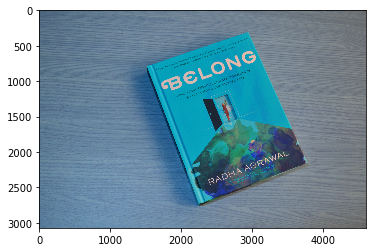

In [15]:
img_oryginal = cv2.imread('books_images/book.jpg')
img = img_oryginal.copy()
plt.imshow(img)
plt.show()

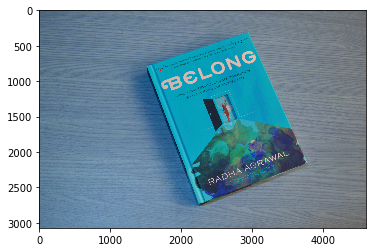

(38, 4, 2)
[[2793.6 2397.6]
 [2829.6 2397.6]
 [2829.6 2440.8]
 [2793.6 2440.8]]


In [27]:
box_2 = np.int0(boxes[37])
cv2.drawContours(img, [box_2], 0, (255, 0, 0), 1)
plt.imshow(img)
plt.show()
print(boxes.shape)
print(boxes[37])

In [48]:

for box in boxes:
    poly = np.array(box).astype(np.int32).reshape((-1))
    poly = poly.reshape(-1, 2)
    cv2.polylines(img, [poly.reshape((-1, 1, 2))], True, color=(255, 0, 0), thickness=2)


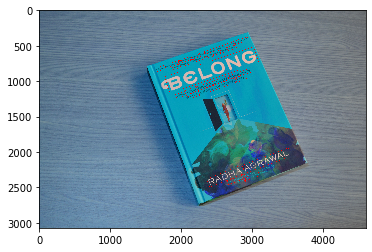

In [49]:
plt.imshow(img)
plt.show()

In [51]:
# cv2.imwrite("result.jpg", img);
# img = cv2.imread("test.png")
# pts = np.array([[10,150],[150,100],[300,150],[350,100],[310,20],[35,10]])
poly = np.array(boxes[0]).astype(np.int32).reshape((-1))
poly = poly.reshape(-1, 2)
poly

array([[2811,  416],
       [2935,  381],
       [2949,  429],
       [2825,  465]], dtype=int32)

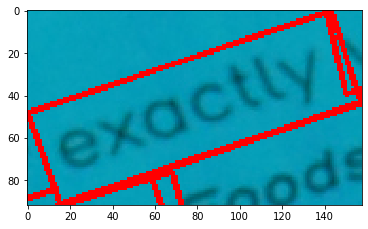

In [57]:
i_box = 3
poly = np.array(boxes[i_box]).astype(np.int32).reshape((-1))
poly = poly.reshape(-1, 2)
rect = cv2.boundingRect(poly)
x,y,w,h = rect
croped = img[y:y+h, x:x+w].copy()
plt.imshow(croped)
plt.show()

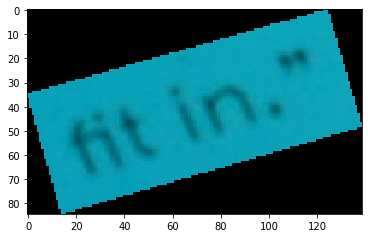

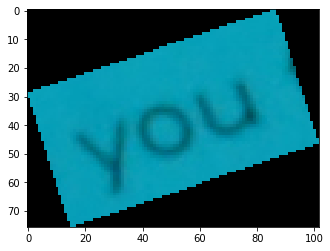

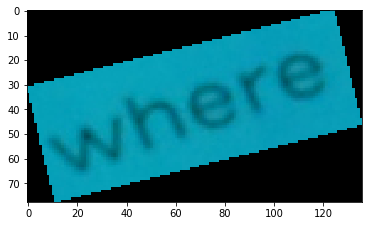

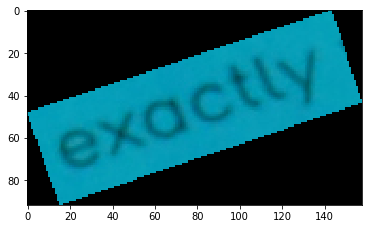

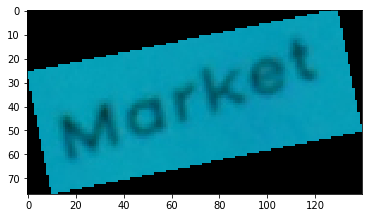

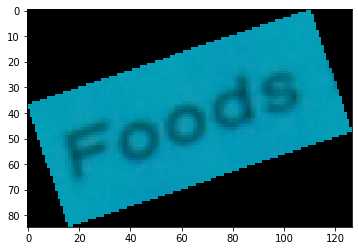

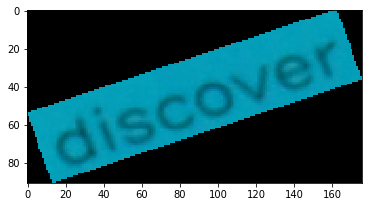

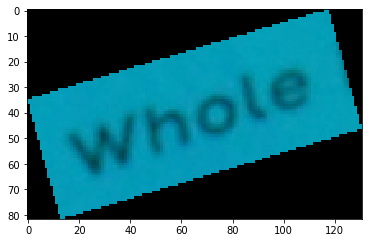

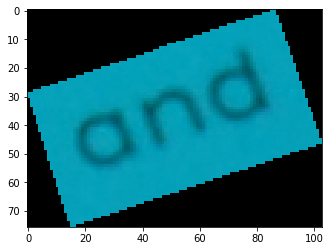

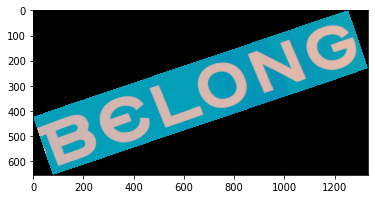

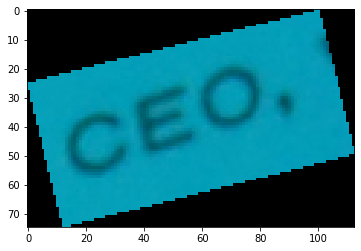

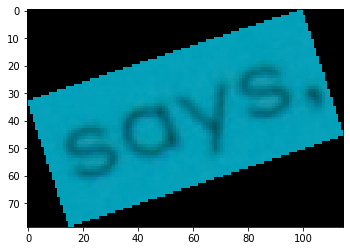

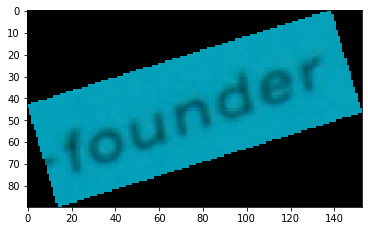

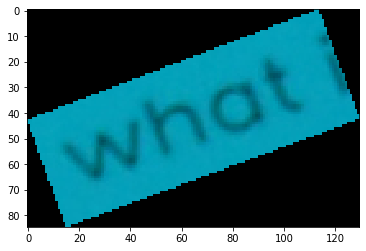

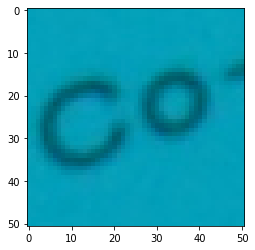

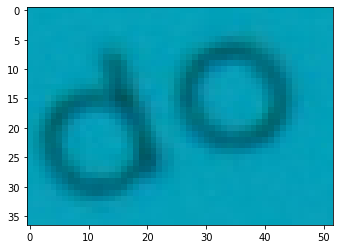

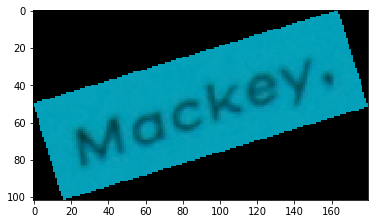

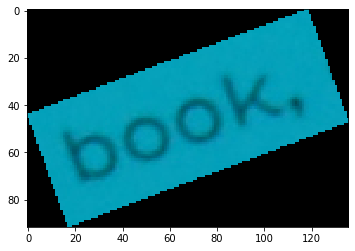

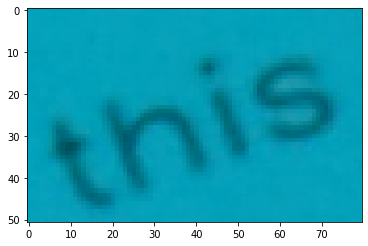

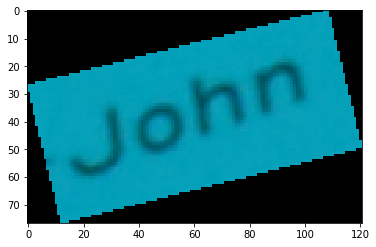

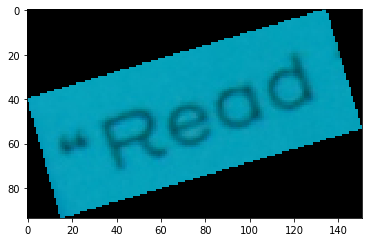

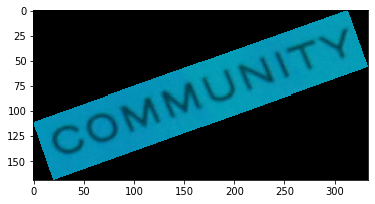

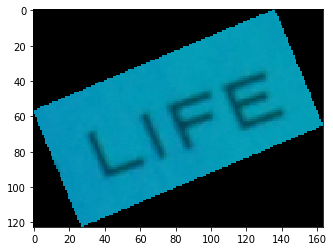

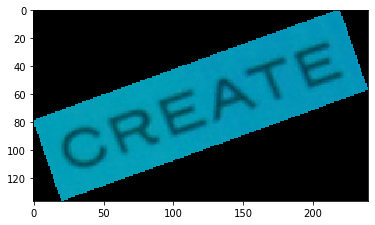

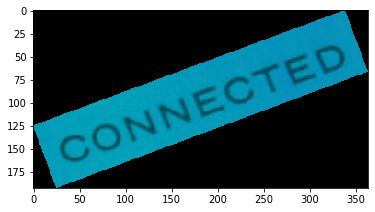

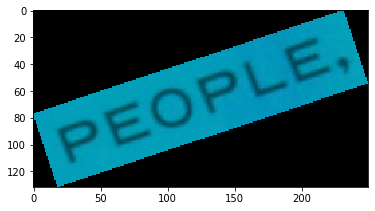

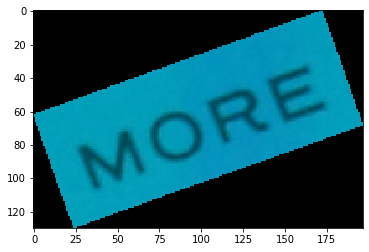

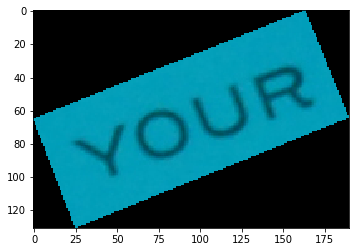

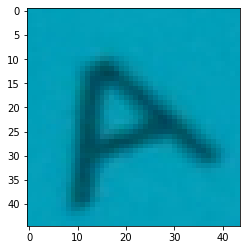

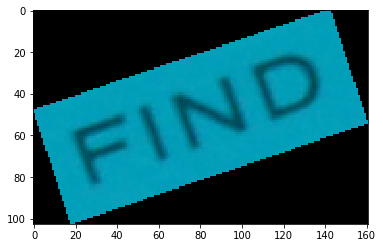

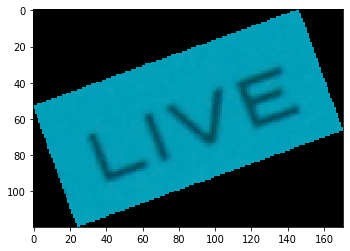

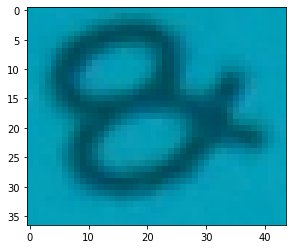

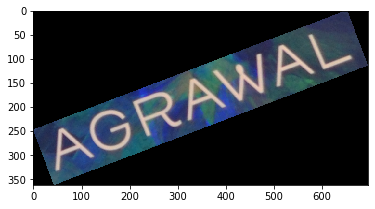

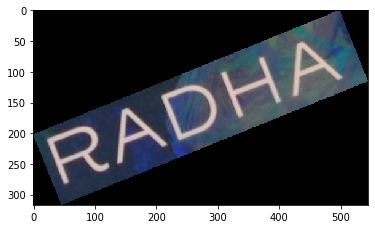

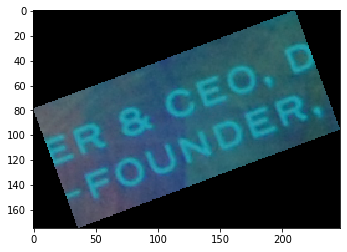

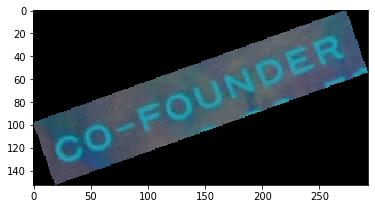

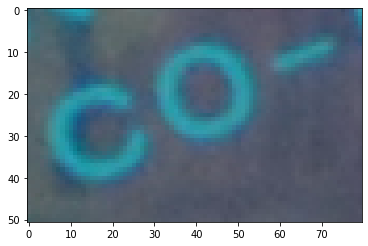

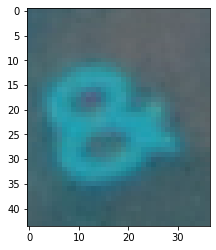

In [72]:
img = img_oryginal.copy()
img_new = img_oryginal.copy()
for box in boxes:
    poly = np.array(box).astype(np.int32).reshape((-1))
    poly = poly.reshape(-1, 2)
    rect = cv2.boundingRect(poly)
    x,y,w,h = rect
    
    mask = np.zeros(img.shape, dtype=np.uint8)
    roi_corners = poly
    channel_count = img_new.shape[2]
    ignore_mask_color = (255,)*channel_count
    cv2.fillConvexPoly(mask, roi_corners, ignore_mask_color)

    img_masked = cv2.bitwise_and(img_new, mask)
    
    croped = img_masked[y:y+h, x:x+w].copy()
    
    plt.imshow(croped)
    plt.show()